# Part 3 - Spatial operations on geometries

Previously, in <a href="part1_introduction_what_is_geometry.ipynb">Part 1</a> of this guide series to the `arcgis.geometry` module, you have seen the introduction to the module and some foundational concepts. In <a href="part2_working_with_geometries.ipynb">Part 2</a>, you learned how to create geometry objects, their properties, and how to work with one, including its interactions with map widgets.  In this part, let's continue to explore spatial operations of geometry objects using two different usage patterns.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spatial-Operations" data-toc-modified-id="Spatial-Operations-1">Spatial Operations</a></span><ul class="toc-item"><li><span><a href="#Two-patterns-of-applying-spatial-operations" data-toc-modified-id="Two-patterns-of-applying-spatial-operations-1.1">Two patterns of applying spatial operations</a></span></li><li><span><a href="#a.-OOP-Pattern---Uses-local-geometry-engine" data-toc-modified-id="a.-OOP-Pattern---Uses-local-geometry-engine-1.2">a. OOP Pattern - Uses local geometry engine</a></span><ul class="toc-item"><li><span><a href="#a1.-Union" data-toc-modified-id="a1.-Union-1.2.1">a1. Union</a></span></li><li><span><a href="#a2.-Difference" data-toc-modified-id="a2.-Difference-1.2.2">a2. Difference</a></span></li><li><span><a href="#a3.-Symmetric-difference" data-toc-modified-id="a3.-Symmetric-difference-1.2.3">a3. Symmetric difference</a></span></li><li><span><a href="#a4.-intersect()-V.S.-overlaps()" data-toc-modified-id="a4.-intersect()-V.S.-overlaps()-1.2.4">a4. intersect() V.S. overlaps()</a></span></li><li><span><a href="#a5.-Equals" data-toc-modified-id="a5.-Equals-1.2.5">a5. Equals</a></span></li><li><span><a href="#a6.-generalize()-V.S.-buffer()" data-toc-modified-id="a6.-generalize()-V.S.-buffer()-1.2.6">a6. generalize() V.S. buffer()</a></span></li><li><span><a href="#a7.-Find-the-nearest-point" data-toc-modified-id="a7.-Find-the-nearest-point-1.2.7">a7. Find the nearest point</a></span></li><li><span><a href="#a8.-contains()" data-toc-modified-id="a8.-contains()-1.2.8">a8. contains()</a></span></li><li><span><a href="#a9.-Clip-a-geometry-object" data-toc-modified-id="a9.-Clip-a-geometry-object-1.2.9">a9. Clip a geometry object</a></span></li></ul></li><li><span><a href="#b.-Pattern-using-arcgis.geometry.functions:-uses-server-side-geometry-engine" data-toc-modified-id="b.-Pattern-using-arcgis.geometry.functions:-uses-server-side-geometry-engine-1.3">b. Pattern using <code>arcgis.geometry.functions</code>: uses server-side geometry engine</a></span><ul class="toc-item"><li><span><a href="#b1.-Union" data-toc-modified-id="b1.-Union-1.3.1">b1. Union</a></span></li><li><span><a href="#b2.-intersect()-V.S.-overlaps()" data-toc-modified-id="b2.-intersect()-V.S.-overlaps()-1.3.2">b2. intersect() V.S. overlaps()</a></span></li><li><span><a href="#b3.-Difference" data-toc-modified-id="b3.-Difference-1.3.3">b3. Difference</a></span></li><li><span><a href="#b4.-Symmetric-difference" data-toc-modified-id="b4.-Symmetric-difference-1.3.4">b4. Symmetric difference</a></span></li><li><span><a href="#b5.-Equals" data-toc-modified-id="b5.-Equals-1.3.5">b5. Equals</a></span></li><li><span><a href="#b6.-generalize()-V.S.-buffer()" data-toc-modified-id="b6.-generalize()-V.S.-buffer()-1.3.6">b6. generalize() V.S. buffer()</a></span></li><li><span><a href="#b7.-Distance" data-toc-modified-id="b7.-Distance-1.3.7">b7. Distance</a></span></li><li><span><a href="#b8.-Determine-the-spatial-relation-between-two-geometries" data-toc-modified-id="b8.-Determine-the-spatial-relation-between-two-geometries-1.3.8">b8. Determine the spatial relation between two geometries</a></span></li><li><span><a href="#b9.-Clip-a-geometry-object" data-toc-modified-id="b9.-Clip-a-geometry-object-1.3.9">b9. Clip a geometry object</a></span></li><li><span><a href="#b10.-Areas-and-Lengths" data-toc-modified-id="b10.-Areas-and-Lengths-1.3.10">b10. Areas and Lengths</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2">Conclusion</a></span></li></ul></div>

## Spatial Operations

What are spatial operations? Spatial operations are functions that "create new spatial data from specified input data", e.g. `union`, `difference`, `symmetric difference`, and `intersection`, and can be used for a variety of spatial analyses. For example, government authorities may use the `intersect` operation to determine whether a proposed road cuts through a restricted piece of land such as a nature reserve or a private property.

Chained operations are even more powerful. For example, in order to identify food deserts within an urban area, the analysis might begin by performing a `union` operation to the service areas of grocery stores, farmer's markets, and food co-ops. Then, taking the `difference` between this single geometry of all services areas and that of a polygon delineating a neighborhood would reveal the areas within that neighborhood where access to healthy, whole foods may not exist.


### Two patterns of applying spatial operations
There are two ways of performing spatial operations 

- (a) `Object Oriented Programming (OOP)` pattern - here you create a geometry object first, then call methods off the geometry object, and 
- (b) calling functions from `arcgis.geometry.functions` directly without instantiating any geometry objects, e.g. the `from_geo_coordinate_string` or `to_geo_coordinate_string` methods, which take spatial data as input, analyze the data, then produce output data that is the derivative of the analysis performed on the input data.

The major difference between these two is that the **OOP pattern uses local geometry engines** such as `shapely` or `arcpy`, while calling **functions from `arcgis.geometry.functions` will use server-side geometry engine** by sending the geometries over to the [Geometry Service](https://developers.arcgis.com/rest/services-reference/geometry-service.htm) configured with your web GIS server. If your web GIS is ArcGIS Online, the latter pattern requires credits. Further, the latter pattern is not performant for larger datasets. Users are recommended to only use (b) if they do not have access to either of the local geometry engines. Further more, if you want to process geometries on the server, rather than applying (b), you can also publish the data as feature service and then run analyses using `arcgis.feature` module.

The rest of this page demonstrates a set of spatial operations performed using both these patterns.

### a. OOP Pattern - Uses local geometry engine

Before demonstrating spatial operations, let us first import the necessary libraries, and create a GIS instance that connects to ArcGIS Online.

<div class="alert alert-info">
    <b>Note:</b> If you are running this guide in an environment <b>without <code>arcpy</code></b>, you can comment out the line that imports it and proceed with the guide. The Python API will look for the <code>shapely</code> or <code>pyshp</code> library and use it for geometry operations.
</div>

<div class="alert alert-info">
    <b>Note:</b> When using Jupyter/ArcGIS Notebooks interface, you can quickly visualize a geometry object by just querying it in a cell. This lets the notebook know to display the geometry as a SVG image.
    
If you are running this guide in an environment with <code>arcpy</code>, then to visualize the geometries as SVG graphics, replace the cells that query the object with <code>geom_object.as_arcpy</code>
</div>

In [1]:
from arcgis.gis import GIS
from arcgis.geometry import Polygon, Geometry, Point, Polyline
from arcgis.geocoding import geocode
import arcpy

In [2]:
gis = GIS('home')

#### a1. Union

The first method, `<first geom object>.union(<second_geometry>)`, can be called off from a geometry object to construct the geometry that is the set-theoretic union of the input geometries. You are going to see an example of how to create a union of two polygons (e.g. geometry1 and geometry2):

In [3]:
geom1_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8232647.749922129, 4978983.410862541], [-8232389.7749516675, 4978840.091434507], [-8232762.405464557, 4978161.712808477], [-8233001.2711779475, 4978295.477607976], [-8232647.749922129, 4978983.410862541]]]}
geom2_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8232619.086036522, 4978994.876241834], [-8232275.11940924, 4979644.590982256], [-8231988.480553171, 4979482.162297151], [-8232380.220323131, 4978822.892928192], [-8232619.086036522, 4978994.876241834]]]}

In [4]:
geom1 = Polygon(geom1_json)

In [5]:
geom2 = Polygon(geom2_json)

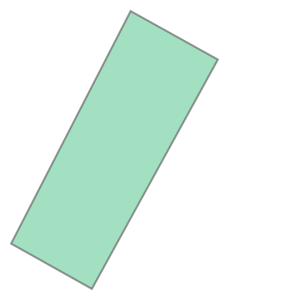

In [6]:
geom1

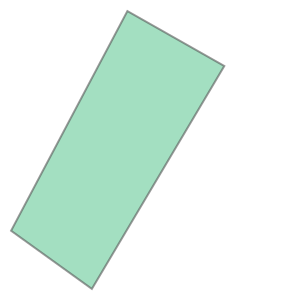

In [7]:
geom2

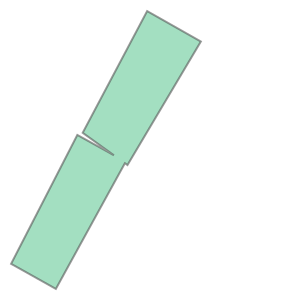

In [8]:
geom_union = geom1.union(geom2)
geom_union

#### a2. Difference

The, `difference(second_geometry)`, constructs the geometry that is composed only of the region unique to the base geometry but not part of the second geometry. The following illustration shows the results that are inside the source geometry, but not the second geometry.

In [9]:
geom3_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8233020.380435019, 4978303.121194171], [-8232303.783294846, 4979640.769189159], [-8232026.699067313, 4979497.449761124], [-8232791.069350163, 4978112.028623458], [-8233020.380435019, 4978303.121194171]]]}

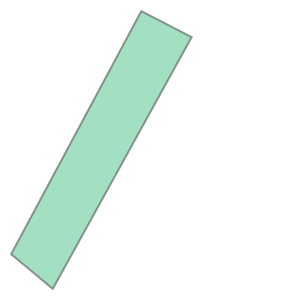

In [10]:
geom3 = Polygon(geom3_json)
geom3

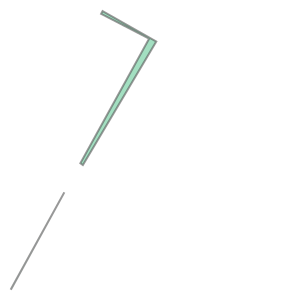

In [11]:
geom_diff = geom_union.difference(geom3)
geom_diff

#### a3. Symmetric difference

Similar to `difference()`, the method `symmetric_difference(second_geometry)` constructs the geometry that is the union of two geometries minus the intersection of those geometries. As told by the definition, the result of `difference()` should always be included/contained in the result of a `symmetric_difference()`.

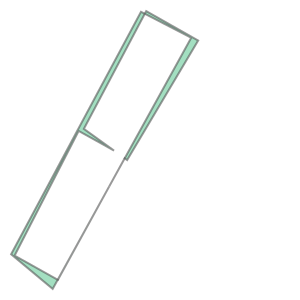

In [12]:
geom_sdiff = geom_union.symmetric_difference(geom3)
geom_sdiff

#### a4. intersect() V.S. overlaps()

The `intersect()` method constructs a geometry that is the geometric intersection of the two input geometries. Different dimension values can be used to create different shape types. The intersection of two geometries of the same shape type is a geometry containing only the regions of overlap between the original geometries, and its arguments include:
  - `second_geometry`: required `arcgis.geometry.Geometry`. 
  - A second geometry `dimension`: required Integer. The topological dimension (shape type) of the resulting geometry, which can be:
    - 1: A zero-dimensional geometry (point or multipoint).
    - 2: A one-dimensional geometry (polyline).
    - 4: A two-dimensional geometry (polygon).

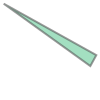

In [13]:
# scroll to the top of this notebook where these two geometries are visualized
geom_intersection = geom1.intersect(second_geometry=geom2, dimension=4)
geom_intersection

While `intersect()` returns a new geometry object, the `overlaps()` method will return a boolean value which indicates if the intersection of the two geometries has the same shape type as one of the input geometries and is not equivalent to either of the input geometries.

According to the definition, we can tell that `overlaps()` contains two operations - first, it creates the intersection of first and second geometries; second, it checks if the intersection is None, or equivalence to either the first or the second geometry - if so, then overlaps() returns `False`, or else, returns `True`.

In [14]:
# True, because the intersection of geom1 and geom2 is partial shape of geom1, and is not
# equivalent to either one
geom1.overlaps(geom2)

True

In [15]:
# False, because the intersection of geom1 and geom_intersection is geom_intersection, 
# and that is equivalent to the second geometry
geom1.overlaps(geom_intersection)

False

#### a5. Equals

`equals()` compares the source geometry with the second to check if they are of the same shape type and define the same set of points in the plane. This is a `2D comparison` only; M and Z values are ignored.

In [16]:
geom1.equals(geom1)

True

In [17]:
geom_intersection.equals(geom_sdiff)

False

#### a6. generalize() V.S. buffer()

Next, you will see the difference between these two spatial operations:
  - `generalize(max_offset)` - Creates a new simplified geometry using a specified maximum offset tolerance (as shown in Figs 1 and 2). The result of the `generalize()` operation against a polyline object is a new polyline, while that against a polygon object is a new polygon.
  - `buffer(distance)` - Constructs a polygon at a specified distance from the geometry. The buffering process merges buffer polygons that overlap. Negative distances greater than one-half the maximum interior width of a polygon result in an empty geometry. Illustration of `buffer()` operations against different geomtry types can be found in Fig 3, which also shows that results of `buffer()` are always polygon objects.

<img src="https://desktop.arcgis.com/en/arcmap/10.3/tools/editing-toolbox/GUID-BA4E50F7-938B-4695-9E96-B9C3B7B96365-web.gif"  />
<p><center>Fig 1. Generialize operation against a polyline object (Source: <a href="https://desktop.arcgis.com/en/arcmap/10.3/tools/editing-toolbox/generalize.htm">ArcMap Toolbox Help</a>)</center></p>
  
<img src="https://desktop.arcgis.com/en/arcmap/latest/tools/cartography-toolbox/GUID-128637E4-C21F-436E-9D37-62741C3B9E93-web.png"  />
<p><center>Fig 2. Generialize operation against a polygon object (Source: <a href="https://desktop.arcgis.com/en/arcmap/latest/tools/cartography-toolbox/simplify-polygon.htm">ArcMap Toolset Help</a>)</center><p>
  
<img src="http://webhelp.esri.com/arcgisdesktop/9.2/published_images/ST_Buffer.gif" />
<p><center>Fig 3. Buffer operation (Source: <a href="http://webhelp.esri.com/arcgisdesktop/9.2/index.cfm?TopicName=Spatial_operations">ArcGIS Desktop Help</a>)</center></p>

To illustrate generalization, let us construct a complex polyline object.

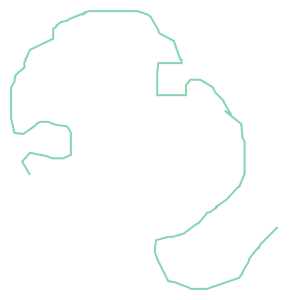

In [84]:
polyline1 = Polyline({'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'paths': [[[-8235190.176786223, 4978434.716352775], [-8235198.537086192, 4978449.048295577],[-8235190.176786223, 4978458.602924112],[-8235172.261857721, 4978455.019938411],[-8235166.290214886, 4978452.631281278], [-8235154.346929218, 4978452.631281278],[-8235145.9866292495, 4978456.214266978],[-8235145.9866292495, 4978465.768895513], [-8235145.9866292495, 4978471.7405383475],[-8235145.9866292495, 4978480.100838316],[-8235148.375286384, 4978484.878152583], [-8235150.763943518, 4978487.266809717],[-8235160.318572052, 4978488.461138284],[-8235165.09588632, 4978489.65546685], [-8235171.067529154, 4978492.044123984],[-8235178.233500555, 4978492.044123984],[-8235181.816486255, 4978490.849795417], [-8235185.399471956, 4978487.266809717],[-8235197.342757625, 4978478.906509749],[-8235206.89738616, 4978480.100838316],[-8235210.48037186, 4978495.627109685], [-8235210.48037186, 4978508.76472392], [-8235210.48037186, 4978509.959052487], [-8235210.48037186, 4978514.736366754], [-8235210.48037186, 4978520.7080095885], [-8235210.48037186, 4978521.902338156], [-8235210.48037186, 4978523.096666723], [-8235210.48037186, 4978524.29099529], [-8235210.48037186, 4978525.485323856], [-8235210.48037186, 4978529.068309557], [-8235206.89738616, 4978535.039952391], [-8235206.89738616, 4978536.234280958], [-8235205.703057593, 4978542.205923792], [-8235204.508729026, 4978543.400252359], [-8235203.314400459, 4978544.594580926], [-8235202.120071892, 4978545.788909492], [-8235196.148429058, 4978550.56622376], [-8235196.148429058, 4978552.954880893], [-8235196.148429058, 4978554.14920946], [-8235196.148429058, 4978555.343538027], [-8235196.148429058, 4978556.537866594], [-8235194.954100491, 4978557.732195161], [-8235194.954100491, 4978558.926523728], [-8235194.954100491, 4978560.120852294], [-8235193.759771924, 4978561.315180861], [-8235190.176786223, 4978569.67548083], [-8235165.09588632, 4978581.618766498], [-8235165.09588632, 4978592.3677236], [-8235161.512900619, 4978594.756380733], [-8235161.512900619, 4978595.9507093], [-8235156.735586352, 4978599.533695001], [-8235151.958272084, 4978600.728023568], [-8235150.763943518, 4978600.728023568], [-8235147.180957817, 4978603.116680701], [-8235135.237672148, 4978607.893994969], [-8235134.043343581, 4978607.893994969], [-8235132.849015014, 4978607.893994969], [-8235132.849015014, 4978609.088323535], [-8235131.654686447, 4978609.088323535], [-8235130.46035788, 4978609.088323535], [-8235130.46035788, 4978610.282652102], [-8235125.683043613, 4978611.476980669], [-8235105.379457977, 4978611.476980669], [-8235101.796472277, 4978611.476980669], [-8235100.60214371, 4978611.476980669], [-8235099.407815143, 4978611.476980669], [-8235098.2134865755, 4978611.476980669], [-8235097.0191580085, 4978611.476980669], [-8235095.8248294415, 4978611.476980669], [-8235087.464529474, 4978611.476980669], [-8235086.270200907, 4978611.476980669], [-8235085.07587234, 4978611.476980669], [-8235083.881543773, 4978611.476980669], [-8235082.687215206, 4978611.476980669], [-8235081.492886639, 4978611.476980669], [-8235075.521243805, 4978611.476980669], [-8235074.326915238, 4978611.476980669], [-8235063.577958137, 4978607.893994969], [-8235059.994972437, 4978605.505337835], [-8235051.6346724685, 4978591.173395033], [-8235051.6346724685, 4978589.979066466], [-8235050.4403439015, 4978587.590409333], [-8235034.914072532, 4978579.230109365], [-8235027.748101131, 4978558.926523728], [-8235026.553772564, 4978558.926523728], [-8235026.553772564, 4978555.343538027], [-8235028.942429698, 4978555.343538027], [-8235031.331086832, 4978555.343538027], [-8235045.663029634, 4978555.343538027], [-8235051.6346724685, 4978555.343538027], [-8235052.829001036, 4978544.594580926], [-8235052.829001036, 4978543.400252359], [-8235052.829001036, 4978531.45696669], [-8235052.829001036, 4978530.262638124], [-8235052.829001036, 4978526.679652423], [-8235052.829001036, 4978520.7080095885], [-8235049.2460153345, 4978520.7080095885], [-8235033.719743965, 4978520.7080095885], [-8235021.776458297, 4978520.7080095885], [-8235021.776458297, 4978521.902338156], [-8235021.776458297, 4978531.45696669], [-8235016.99914403, 4978537.428609525], [-8235012.221829762, 4978537.428609525], [-8235006.250186928, 4978537.428609525], [-8234994.306901259, 4978530.262638124], [-8234993.112572692, 4978529.068309557], [-8234991.918244125, 4978527.87398099], [-8234991.918244125, 4978526.679652423], [-8234989.529586992, 4978523.096666723], [-8234981.169287024, 4978514.736366754], [-8234981.169287024, 4978513.542038187], [-8234972.808987056, 4978499.210095385], [-8234979.974958457, 4978503.987409652], [-8234962.060029954, 4978489.65546685], [-8234960.865701388, 4978475.323524048], [-8234958.477044254, 4978470.5462097805], [-8234958.477044254, 4978465.768895513], [-8234958.477044254, 4978464.574566946], [-8234958.477044254, 4978463.380238379], [-8234958.477044254, 4978462.185909812], [-8234958.477044254, 4978452.631281278], [-8234958.477044254, 4978437.105009909], [-8234958.477044254, 4978435.910681342], [-8234964.448687088, 4978421.5787385395], [-8234965.643015655, 4978421.5787385395], [-8234977.586301323, 4978408.441124304], [-8234985.946601291, 4978402.46948147], [-8234988.335258425, 4978401.275152903], [-8234988.335258425, 4978400.080824336], [-8234989.529586992, 4978400.080824336], [-8234989.529586992, 4978398.886495769], [-8234996.695558393, 4978394.109181502], [-8234997.889886959, 4978394.109181502], [-8234999.0842155265, 4978394.109181502], [-8235001.4728726605, 4978390.526195802], [-8235008.638844062, 4978382.165895834], [-8235009.833172629, 4978382.165895834], [-8235024.165115431, 4978371.416938731], [-8235036.108401099, 4978367.833953031], [-8235038.497058233, 4978367.833953031], [-8235040.885715366, 4978367.833953031], [-8235054.023329602, 4978364.25096733], [-8235055.217658169, 4978355.890667362], [-8235055.217658169, 4978353.502010229], [-8235055.217658169, 4978352.307681662], [-8235055.217658169, 4978351.113353095], [-8235052.829001036, 4978343.947381694], [-8235040.885715366, 4978320.060810357], [-8235033.719743965, 4978318.86648179], [-8235027.748101131, 4978316.477824656], [-8235018.193472596, 4978312.894838956], [-8235016.99914403, 4978311.700510389], [-8234999.0842155265, 4978311.700510389], [-8234964.448687088, 4978323.643796057], [-8234960.865701388, 4978328.421110325], [-8234960.865701388, 4978329.615438892], [-8234956.08838712, 4978337.97573886], [-8234954.894058553, 4978339.170067427], [-8234954.894058553, 4978340.364395994], [-8234953.6997299865, 4978341.55872456], [-8234953.6997299865, 4978342.753053127], [-8234953.6997299865, 4978343.947381694], [-8234950.116744285, 4978348.724695961], [-8234944.145101451, 4978355.890667362], [-8234942.950772884, 4978355.890667362], [-8234942.950772884, 4978357.084995929], [-8234941.756444317, 4978358.279324496], [-8234941.756444317, 4978359.473653063], [-8234940.56211575, 4978360.66798163], [-8234922.647187248, 4978378.582910133]]]})
polyline1

In [61]:
from IPython.display import display_svg, clear_output, display, HTML
import time

In the cell below, we loop through various offset distances and observe how that effects the amount of generalization. The higher the offset, the greater the generalization. The greater the generalization, the fewer the vertices, leading to less complexity in the resulting geometry. Compact geometries take up less space (for storage) and memory as well.

In [20]:
time.sleep(2)
for offset in [0,10,15,20,25,30,35,40,45,50]:
    # apply generalization
    generalized_polyline = polyline1.generalize(max_offset=offset)
    
    # display logic to create an animation
    display(HTML(f'<p>Offset: {offset}</p>'))
    display_svg(generalized_polyline)
    time.sleep(1)
    clear_output()

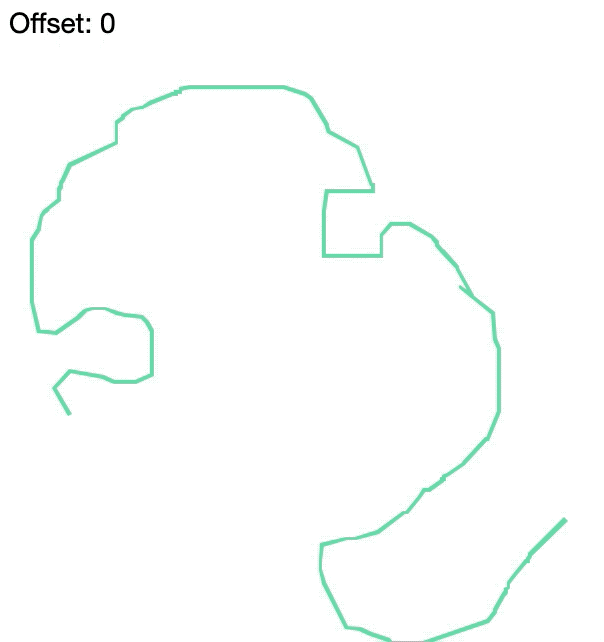

**Buffer**

In the cell below, we loop through various distance measures for the buffer tool. We start with a distance of `1m` (the unit is meters as that is the units of the geometry's spatial reference), where the buffer result is quite similar to the source geometry. As the distance increases, the effect of buffering increases, producing thicker polygons. The tool generalizes the resulting buffer polygon to produce a smooth shape and dissolves overlaps. At a distance of `70m`, the buffer looks like a simple circle.

In [21]:
time.sleep(2)
for distance in [1,10,15,20,25,30,35,40,45,50,55,60,65,70]:
    # apply buffer
    buffered_polyline = polyline1.buffer(distance=distance)
    
    # display logic to create an animation
    display(HTML(f'<p>Buffer distance: {distance}</p>'))
    display_svg(buffered_polyline)
    time.sleep(1)
    clear_output()

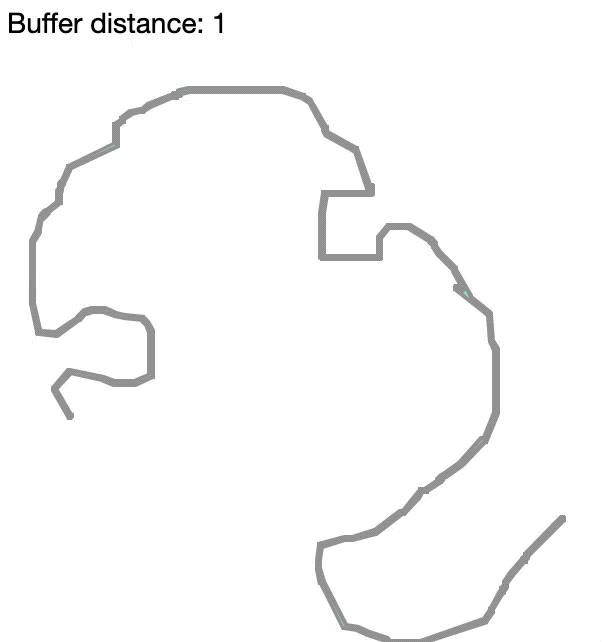

#### a7. Find the nearest point

Imagine that you are jogging on a trail (drawn as the light blue line segment on the map) inside Central Park and looking for a water fountain. You know the water fountain is located inside the pavilion (as marked as the blue pin). You want to know: What is the shortest path from the trail to pavilion?

The method `query_point_and_distance(second_geometry, use_percentage=False)` can find the point on a polyline nearest to the `second_geometry` and the distance between these points. It also returns information about which side of the line the `second_geometry` is on as well as the distance along the line where the nearest point occurs.

In [18]:
access_point = Point({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                      'x': -8234818.501757936, 'y': 4978337.398475052})

In [19]:
access_polyline = Polyline({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                            'paths': [[[-8234920.019686119, 4978251.645698531], [-8234885.38415768, 4978242.091069995], 
                                       [-8234849.554300674, 4978245.674055696], [-8234808.947129401, 4978255.228684231],
                                       [-8234773.117272396, 4978251.645698531], [-8234751.619358192, 4978239.702412861],
                                       [-8234736.093086823, 4978215.815841525]]]})


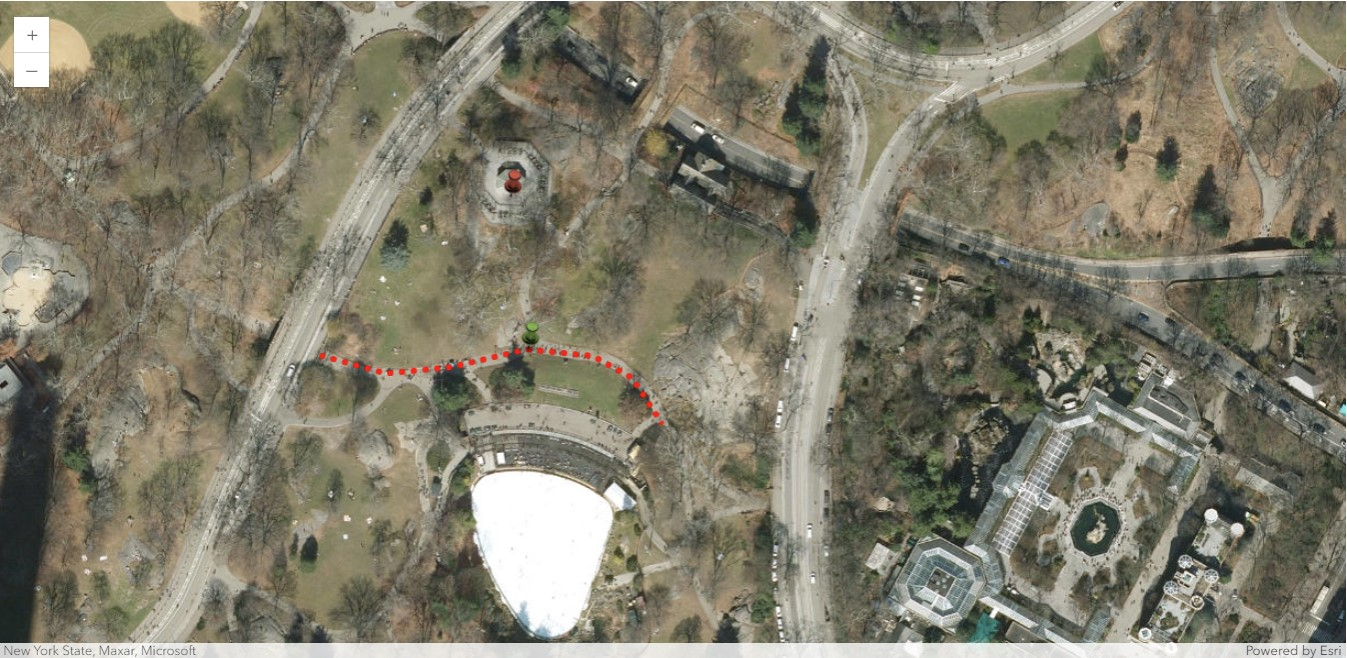

In [23]:
map1 = gis.map()
map1.basemap.basemap = "satellite"
map1.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -8235024.105413707,
 'ymin': 4978145.828180327,
 'xmax': -8234435.301430117,
 'ymax': 4978384.69389375}
map1

In [21]:
from arcgis.map.symbols import SimpleLineSymbolEsriSLS, SimpleLineSymbolStyle, PictureMarkerSymbolEsriPMS

symbol = SimpleLineSymbolEsriSLS(
  style = SimpleLineSymbolStyle.esri_sls_short_dot,
  color = [255, 0, 0], #red
  width = 4,
)

map1.content.draw(access_polyline, symbol=symbol)

In [22]:
map1.content.draw(access_point, 
          symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/RedShinyPin.png",
                    "contentType":"image/png","width":24,"height":24}))

Now let us use
```
query_point_and_distance(second_geometry, use_percentage=False)
```
to find the point on the polyline (`access_polyline`) nearest to the `second_geometry` (`access_point`). The `acces_res` variable assigned to the results contains:

- the PointGeometry object for the nearest point,
- the x-, and y- coordinates of this point
- the distance between those points

In [24]:
access_res = access_polyline.query_point_and_distance(access_point)
access_res

(<PointGeometry object at 0x24c31041290[0x24c22205e00]>,
 113.65391060742849,
 82.72342745570265,
 False)

In [25]:
access_res[0].type

'point'

In [26]:
access_res[0].JSON

'{"x":-8234808.9471294014,"y":4978255.2286842307,"spatialReference":{"wkid":102100,"latestWkid":3857}}'

With the information we can now draw the nearest point on the map view as well, with the selected symbology (which is the green pin marker).

In [27]:
a_p = Point({"x":-8234808.9471294014,"y":4978255.2286842307,"spatialReference":{"wkid":102100,"latestWkid":3857}})

In [31]:
map1.content.draw(a_p, 
          symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/GreenShinyPin.png",
                    "contentType":"image/png","width":24,"height":24}))

#### a8. contains()

The method `contains(second_geometry, relation=None)` indicates if the base geometry contains the comparison geometry.

In [28]:
access_polyline.contains(a_p)

True

The `contains` method accepts an optional parameter `relation`, which can be used to specify the spatial relationship type.
  - `BOUNDARY` - Relationship has no restrictions for interiors or boundaries.
  - `CLEMENTINI` - Interiors of geometries must intersect. Specifying CLEMENTINI is equivalent to specifying None. This is the default.
  - `PROPER` - Boundaries of geometries must not intersect.

In [29]:
access_polyline.contains(a_p, relation = "PROPER")

True

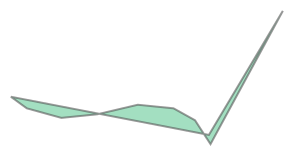

In [30]:
access_polygon = Polygon({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                          'rings': [[[-8234920.019686119, 4978251.645698531], [-8234885.38415768, 4978242.091069995], 
                                     [-8234849.554300674, 4978245.674055696], [-8234808.947129401, 4978255.228684231],
                                     [-8234773.117272396, 4978251.645698531], [-8234751.619358192, 4978239.702412861],
                                     [-8234736.093086823, 4978215.815841525], [-8234663.657066563, 4978349.222320599], 
                                     [-8234737.705437716, 4978225.012149632], [-8234935.963979837, 4978263.2306637755]]]})
access_polygon

In [31]:
access_polygon.contains(access_polyline)

False

In [32]:
access_polygon.contains(access_polyline, relation = "BOUNDARY")

True

#### a9. Clip a geometry object

The method `clip(envelope)` constructs the intersection of the geometry and the specified extent. Note that, if `ArcPy` is not installed, none is returned. The one and required input parameter is:
  - `envelope`: required tuple. The tuple must be in the form of a tuple (XMin, YMin, XMax, YMax) where each value represents the lower left bound and upper right bound of the extent.

In [33]:
# (XMin, YMin, XMax, YMax) 
x = access_polygon.centroid[0]
y = access_polygon.centroid[1]
envelope_tuple = (x-10, y-10, x+10, y+10)

In [34]:
clipped = access_polygon.clip(envelope_tuple)
clipped.JSON

'{"rings":[[[-8234806.8547196267,4978238.3421316873],[-8234812.0827846276,4978239.349951447],[-8234812.0827846276,4978254.4908830011],[-8234808.9471294014,4978255.2286842307],[-8234792.0827846276,4978253.5422497531],[-8234792.0827846276,4978238.3421316873],[-8234806.8547196267,4978238.3421316873]]],"spatialReference":{"wkid":102100,"latestWkid":3857}}'

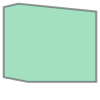

In [35]:
clipped.as_arcpy

You can find the source geometry (dark shaded polygon) and the clipped geometry (the contained polygon with white diagnoal crosses) in the map below:


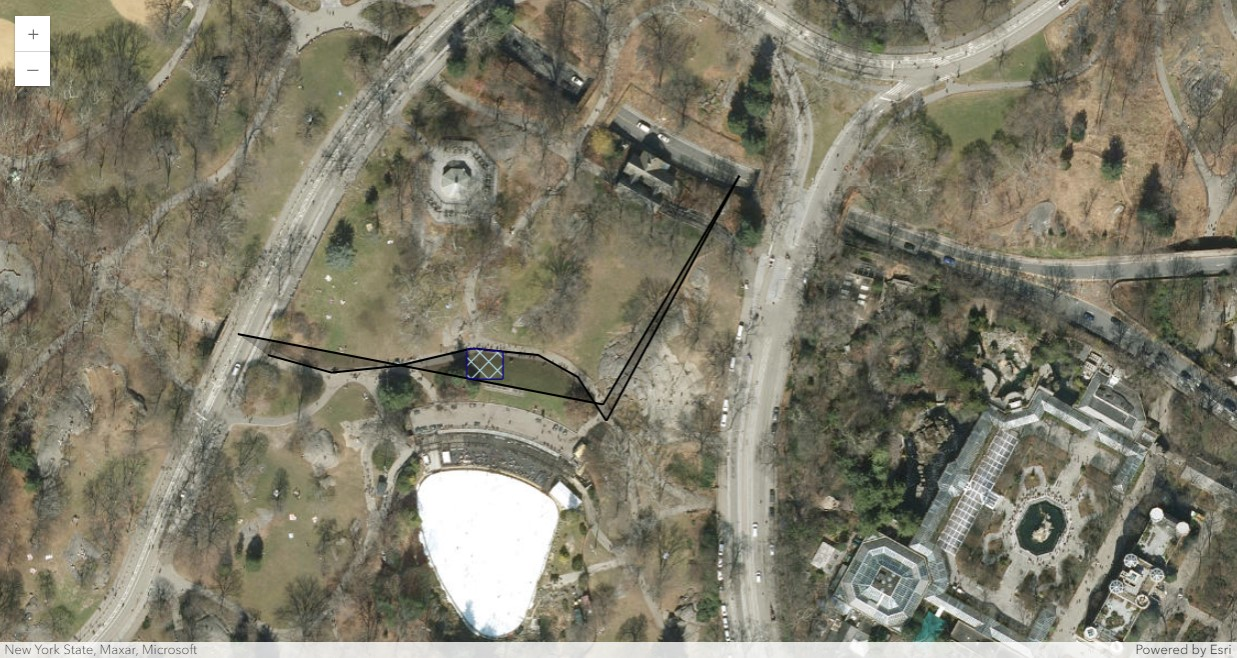

In [44]:
map2 = gis.map()
map2.basemap.basemap = "satellite"
map2

In [42]:
map2.extent = map1.extent
map2.zoom = 19

In [38]:
map2.content.draw(access_polygon)

In [39]:
from arcgis.map.symbols import SimpleFillSymbolEsriSFS

map2.content.draw(clipped,
          symbol = SimpleFillSymbolEsriSFS(**{
                      "type" : "esriSFS",
                      "style" : "esriSFSDiagonalCross",
                      "outline" : SimpleLineSymbolEsriSLS(
                          color = [0, 0, 139]
                        ),
                      "color": [173, 216, 230, 255]
                    }))

Up till this point, you have tried creating geometry objects and performed spatial operations such as `union` and `intersect`, from the built-in methods of these geometry objects using the OOP pattern. Doing so executed the operations using **local geometry engines** (ArcPy or Shapely). Next, let us explore the other way in performing spatial operations.

### b. `arcgis.geometry.functions` pattern: using the server-side geometry engine

Besides calling methods off the geometry object as discussed in section (a), users can also call spatial operations directly from `arcgis.geometry.functions`. In the following section, you will see spatial operations such as `union` and `intersect` being performed with global functions.

In [40]:
from arcgis.geometry.functions import union, intersect, difference, generalize, buffer, relation

#### b1. Union

Compared to what is used in section (a1) in performing `union` operation (a.k.a. `geom_union = geom1.union(geom2)`), calling the `union()` method directly on a geometry resource service would require these input parameters:
  - `spatial_ref` - The well-known ID of the spatial reference or a spatial reference json object.
  - `geometries` - The array of geometries to be unioned.
  - `gis` - The active GIS instance.

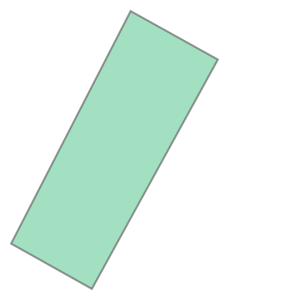

In [45]:
geom1

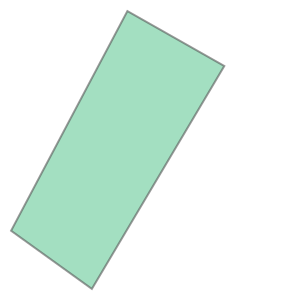

In [46]:
geom2

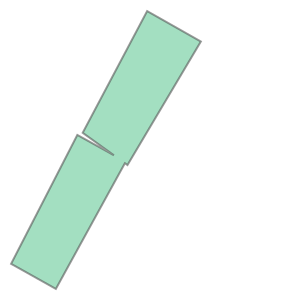

In [47]:
geom_union_b = union(spatial_ref={"wkid":102100,"latestWkid":3857},
                     geometries = [geom1, geom2],
                     gis = gis)
geom_union_b[0]

#### b2. intersect() V.S. overlaps()

The intersect function `arcgis.geometry.functions.intersect(spatial_ref, geometries, geometry, gis=None)` is performed on a geometry service resource. This function constructs the set-theoretic intersection between an array of geometries and another geometry. The dimension of each resultant geometry is the minimum dimension of the input geometry in the geometries array and the other geometry specified by the geometry parameter. Inputs include:
  - `spatial_ref` - The well-known ID or a spatial reference JSON object for the input geometries.
  - `geometries` - An array of points, multipoints, polylines, or polygons. The structure of each geometry in the array is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API.
  - `geometry` - A single geometry of any type with a dimension equal to or greater than the elements of geometries.

Let's see how it compares to what we used in section (a4) - `geom_intersection = geom1.intersect(second_geometry=geom2, dimension=4)`:

In [48]:
geom_intersection_b = intersect(spatial_ref={"wkid":102100,"latestWkid":3857}, 
                                geometries=[geom1], 
                                geometry=geom2, 
                                gis=gis)
geom_intersection_b

[{'rings': [[[-8232389.775, 4978840.0913999975],
    [-8232393.8368, 4978832.696800001],
    [-8232452.5265, 4978874.953400001],
    [-8232389.775, 4978840.0913999975]]],
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}]

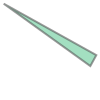

In [49]:
geom_intersection_b[0]

Unfortunately, there is no direct match of the `overlaps()` function from section a4 in the `arcgis.geometry.functions`.

However, we can write our own function as in `my_overlap` in situations when OOP pattern is not applicable, and it includes two operations - first, it creates the interection of first and second geometries; second, it checks if the intersection is None, or it being equivalent to either the first or the second geometry - if so, then overlaps() returns `False`, or else, returns `True`.

In [50]:
def my_overlap(spatial_ref, geometry1, geometry2, gis):
    intersection = intersect(spatial_ref, 
                             geometries=[geometry1], 
                             geometry=geometry2, 
                             gis=gis)
    if intersection is None:
        return False
    elif intersection[0].equals(geometry1) or intersection[0].equals(geometry2):
        return False
    else:
        return True

In [51]:
# False, because the intersection of geom1 and geom_union is geom1, and that is equivalent to the first geometry
my_overlap(3857, geom1, geom_union, gis)

False

In [59]:
# False, because the intersection of geom1 and geom_intersection is geom_intersection, and is equivalent to the second geometry
my_overlap(3857, geom1, geom_intersection, gis)

False

#### b3. Difference

In order to construct the set-theoretic difference between each element of an array of geometries and another geometry (a.k.a. the so-called difference geometry), users need to perform a `difference` function on a geomtry service resource, which requires these inputs:
 - `geometries` - An array of points, multipoints, polylines or polygons. The structure of each geometry in the array is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API.
 - `spatial_ref` - The well-known ID of the spatial reference or a spatial reference JSON object for the input geometries.
  - `geometry` - A single geometry of any type and of a dimension equal to or greater than the elements of geometries. The structure of geometry is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API. The use of simple syntax is not supported.
    
In other words, when performing `arcgis.geometry.functions.difference(geometries=[A1, A2, ..., AN], spatial_ref, geometry=B, gis=None)`, let B be the difference geometry. For each geometry in [A1, A2, ..., AN], in the input geometry array, it constructs a new geometry `An-B` (that n is numbered from 1 to N).

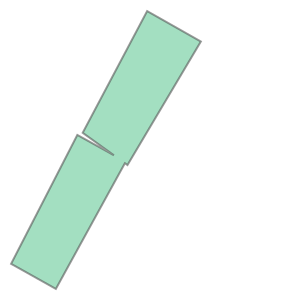

In [62]:
display_svg(geom_union)

In [63]:
geom_diff_b = difference(geometries=[geom1, geom2, geom_union], 
                         spatial_ref=3857, 
                         geometry=geom3, 
                         gis=gis)
geom_diff_b

[{'rings': [[[-8232479.221100001, 4978677.253700003],
    [-8232762.4055, 4978161.712800004],
    [-8232763.3619, 4978162.248400003],
    [-8232479.221100001, 4978677.253700003]]],
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}},
 {'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232393.5667, 4978832.502300002],
    [-8232026.699100001, 4979497.4498],
    [-8232282.8696, 4979629.951800004],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]]],
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}},
 {'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232393.5666000005, 4978832.502300002],
    [-8232026.699100001, 4979497.4498],
    [-8232282.8696, 4979629.951800004],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]],
   [[-8232479.2171, 4978677.260799997],
    [-8232762.4055, 4978161.712800004],
    [-82

In [64]:
len(geom_diff_b)

3

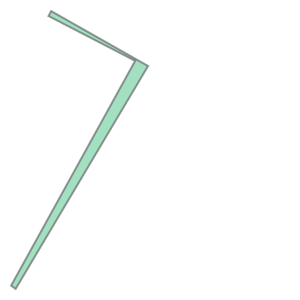

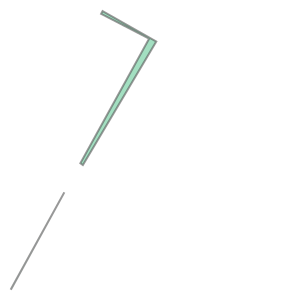

(None, None)

In [65]:
display_svg(geom_diff_b[1]), display_svg(geom_diff_b[2])

In [66]:
""" Compared to geom_diff derived from `geom_diff = geom_union.difference(geom3)`
"""
geom_diff_b[2].equals(geom_diff)

True

#### b4. Symmetric difference

Again, there is no direct match of the aforementioned `symmetric_difference()` function in the `arcgis.geometry.functions`. In situations when the OOP pattern of this call is not applicable, you can construct your own customized function to create the geometry that is the union of two geometries minus the instersection of those geometries.

In [75]:
def my_symmetric_difference(spatial_ref, geometry1, geometry2, gis):
    union_b = union(spatial_ref = spatial_ref,
                    geometries = [geometry1, geometry2],
                    gis = gis)
    intersect_b = intersect(spatial_ref = spatial_ref, 
                            geometries=[geometry1], 
                            geometry=geometry2, 
                            gis=gis)
    symm_diff_b = difference(geometries=[union_b[0]], 
                             spatial_ref=spatial_ref, 
                             geometry=intersect_b[0], 
                             gis=gis)
    return symm_diff_b[0]

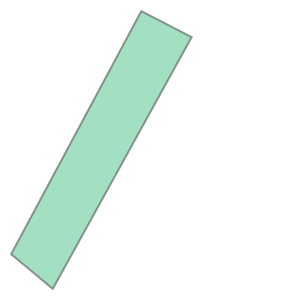

In [76]:
display_svg(geom3)

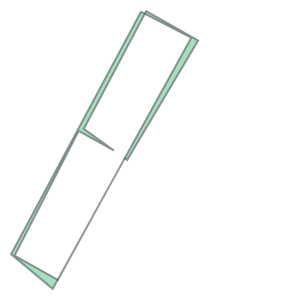

In [77]:
geom_sdiff_b = my_symmetric_difference(3857, geom_union, geom3, gis)
geom_sdiff_b

In [78]:
geom_sdiff_b.equals(geom_sdiff)

True

#### b5. Equals

There is no direct match of `equals()` function in the `arcgis.geometry.functions`. In situations when OOP pattern of this call is not applicable, you can construct your own customized function that checks if two geometries are equal.

In [79]:
def my_equals(spatial_ref, geometry1, geometry2, gis):
    def my_1direction_diff(spatial_ref, geom1, geom2, gis):
        diff_b = difference(geometries=[geom1], 
                            spatial_ref=spatial_ref, 
                            geometry=geom2, 
                            gis=gis)
        # print(diff_b[0])
        if diff_b[0] is None:
            return True
        elif "rings" in diff_b[0] and len(diff_b[0]["rings"])==0:
            return True
        else:
            return False
    
    if geom1.type == geom2.type:
        res1 = my_1direction_diff(spatial_ref, geometry1, geometry2, gis)  
        res2 = my_1direction_diff(spatial_ref, geometry2, geometry1, gis)  
        return res1 and res2
    else:
        return False

In [80]:
# Compared to "geom_intersection.equals(geom_diff)"
my_equals(3857, geom_intersection, geom_diff, gis)

False

In [81]:
# Compared to "geom_intersection.equals(geom_sdiff)"
my_equals(3857, geom_sdiff, geom_intersection, gis)

False

#### b6. generalize() V.S. buffer()

In section (a6), we have already discussed the difference between these two spatial operations:
  - `generalize(max_offset)` - Creates a new simplified geometry using a specified maximum offset tolerance.
  - `buffer(distance)` - Constructs a polygon at a specified distance from the geometry.

Now let us explore how these two spatial operations can be done by executing the functions on the server-side.

The function `arcgis.geometry.functions.generalize(spatial_ref, geometries, max_deviation, deviation_unit, gis=None)` is performed on a geometry service resource. The generalize function simplifies the input geometries using the `Douglas-Peucker algorithm` with a specified `maximum deviation distance`. The output geometries will contain a subset of the original input vertices.

One of the input parameters, the `deviation_unit` represents the unit for maximum deviation. If a unit is not specified, the units are derived from `spatial_ref`. For a list of valid units, see <a href="http://resources.arcgis.com/en/help/arcobjects-cpp/componenthelp/index.html#//000w00000042000000">esriSRUnitType Constants</a>. `9001` here means `Meters`. 

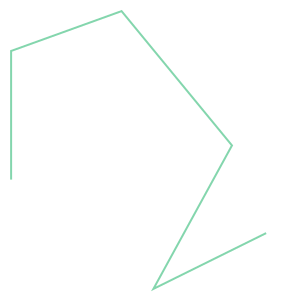

In [85]:
geom_generalized_b = generalize(spatial_ref={"wkid":102100,"latestWkid":3857},
                                geometries=[polyline1],
                                max_deviation=50,
                                deviation_unit="9001",
                                gis=gis)
geom_generalized_b[0]

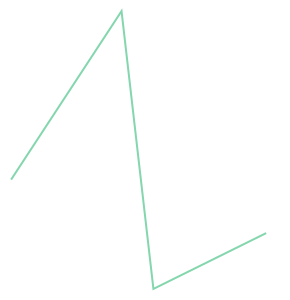

In [86]:
geom_generalized2_b = generalize(spatial_ref={"wkid":102100,"latestWkid":3857},
                                 geometries=[polyline1],
                                 max_deviation=100,
                                 deviation_unit="9001",
                                 gis=gis)
geom_generalized2_b[0]

The buffer function `arcgis.geometry.functions.buffer(geometries, in_sr, distances, unit, out_sr=None, buffer_sr=None, union_results=None, geodesic=None, gis=None)` is performed on a geometry service resource. The result of this function is buffered polygons at the specified distances for the input geometry array. Options are available to union buffers and to use geodesic distance:
  - `union_results` - If True, all geometries buffered at a given distance are united into a single (possibly multipart) polygon, and the united geometry is placed in the output array. The default is False.
  - `geodesic` - Set geodesic to True to buffer the input geometries using geodesic distance. Geodesic distance is the shortest path between two points along the ellipsoid of the earth. If geodesic is set to False, the 2D Euclidean distance is used to buffer the input geometries. The default value depends on the geometry type, unit and buffer_SR.

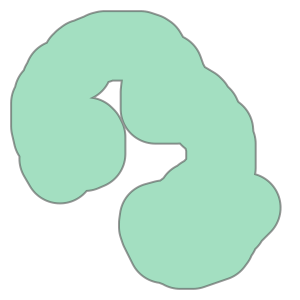

In [87]:
geom_buffered_b = buffer(geometries = [polyline1], 
                         in_sr=3857, 
                         distances=50, 
                         unit="9001", 
                         out_sr=None, 
                         buffer_sr=None, 
                         union_results=None, 
                         geodesic=None, 
                         gis=gis)

geom_buffered_b[0]

The `unit` parameter indicates the units for calculating each buffer distance. If not specified, the units are derived from ``bufferSR``. If ``bufferSR`` is not specified, the units are derived from ``in_sr``. In the example above, we are calling the `buffer` method with `unit` set to be a constant string `"9001"`. Equivalently we can use a constant `Enum`, e.g. `LengthUnits.METER`, or the integer `9001` to specify the same requirement.

```
from arcgis.geometry import LengthUnits
geom_buffered_b = buffer(geometries = [polyline1], 
                         in_sr=3857, 
                         distances=50, 
                         unit=LengthUnits.METER, 
                         out_sr=None, 
                         buffer_sr=None, 
                         union_results=None, 
                         geodesic=None, 
                         gis=gis)
```

#### b7. Distance

From section (a7) we have figured out that `a_p` is the closest point on the trail from the pavilion, is there a way to confirm that the distance from `a_p` to the `access_point` is in fact the shortest?

The distance function `arcgis.geometry.functions.distance(spatial_ref, geometry1, geometry2, distance_unit='', geodesic=False, gis=None)` is performed on a geometry service resource. It reports the 2D Euclidean or geodesic distance between the two geometries. We can take advantage of the `distance()` method in validation.

In [88]:
from arcgis.geometry import distance
radius = distance(   spatial_ref=3857, 
                     geometry1=access_point, 
                     geometry2=a_p, 
                     distance_unit='9001', 
                     geodesic=False, 
                     gis=gis)
radius['distance']

82.72342745570265

In [89]:
access_point_buffer = buffer( geometries = [access_point], 
                              in_sr=3857, 
                              distances=radius['distance'], 
                              unit="9001", 
                              out_sr=3857, 
                              buffer_sr=3857, 
                              union_results=None, 
                              geodesic=None, 
                              gis=gis)

In [90]:
access_point_buffer[0].spatialReference = {"wkid":102100,"latestWkid":3857}


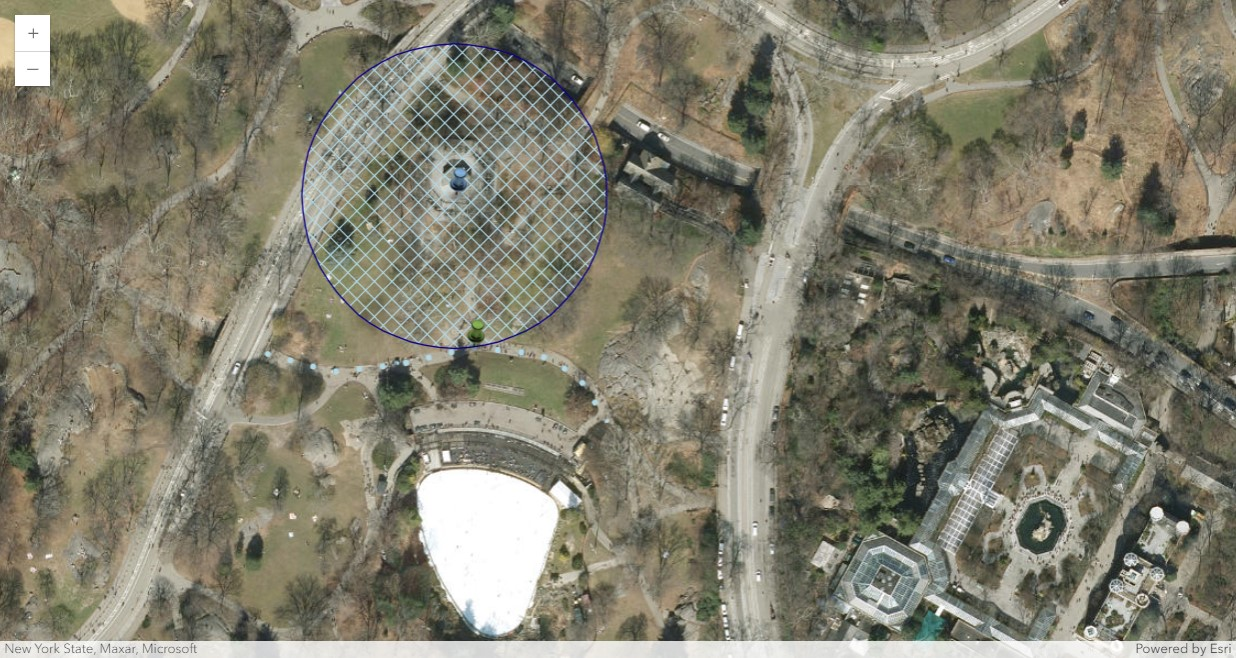

In [97]:
map3 = gis.map()
map3.basemap.basemap = "satellite"
map3

In [92]:
map3.height= "650px"
map3.extent = map1.extent
map3.zoom = 19

In [93]:
map3.content.draw(access_polyline,
          symbol = SimpleLineSymbolEsriSLS(
            color = [173, 216, 230, 255],
            width = 4,
            style = SimpleLineSymbolStyle.esri_sls_dot
          ))

In [94]:
from arcgis.map.symbols import SimpleFillSymbolStyle

map3.content.draw(access_point_buffer[0],
          symbol = SimpleFillSymbolEsriSFS(
            color = [173, 216, 230, 255],
            outline = SimpleLineSymbolEsriSLS(
              color = [0, 0, 139]
            ),
            style = SimpleFillSymbolStyle.esri_sfs_diagonal_cross
          ))

In [95]:
map3.content.draw(access_point, 
          symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/BlueShinyPin.png",
                    "contentType":"image/png","width":24,"height":24}))

In [96]:
map3.content.draw(a_p, 
          symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/GreenShinyPin.png",
                    "contentType":"image/png","width":24,"height":24}))

It is obvious that the buffer created only intersects with the `access_polyline` at one point - `a_p`, hence we can validate that the shortest path from the trail to the pavilion starts at `a_p`, which corresponds well to the results seen in section (a7).

#### b8. Determine the spatial relation between two geometries

The relation function `arcgis.geometry.functions.relation(geometries1, geometries2, spatial_ref, spatial_relation='esriGeometryRelationIntersection', relation_param='', gis=None)` is performed on a geometry service resource. This function determines the pairs of geometries from the input geometry arrays that participate in the specified spatial relation. Both arrays are assumed to be in the spatial reference specified by `spatial_ref`, which is a required parameter. Geometry types cannot be mixed within an array. The relations are evaluated in 2D. In other words, z coordinates are not used.

The spatial relationship to be tested between the two input geometry arrays is defined by `spatial_relation`, and can be chosen from these values: 

- `esriGeometryRelationCross`
- `esriGeometryRelationDisjoint`
- `esriGeometryRelationIn`
- `esriGeometryRelationInteriorIntersection`
- `esriGeometryRelationIntersection`
- `esriGeometryRelationLineCoincidence`
- `esriGeometryRelationLineTouch`
- `esriGeometryRelationOverlap`
- `esriGeometryRelationPointTouch`
- `esriGeometryRelationTouch`
- `esriGeometryRelationWithin`
- `esriGeometryRelationRelation`

Take the Point Geometry `a_p` and Polyline Geometry `access_polyline` created previously. Let us explore if the specified spatial relation exists between the input geometry arrays. Here, `a_p` is on the `access_polyline`.

In [98]:
"""esriSpatialRelationIn is the same as IRelationalOperator::Within. esriSpatialRelationWithin also allows polylines 
that are strictly on the boundaries of polygons to be considered “in” the polygon. This case is disallowed by the former
relation (and disallowed by IRelationalOperator::Within). 
"""
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationWithin",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [99]:
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationIn",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [100]:
"""`esriGeometryRelationInteriorIntersection` same as esriSpatialRelationIntersection, but excludes intersections that 
occur only at boundaries (two touching polygons for example). The interior of a point is considered to be the point 
itself and the interior of a polyline excludes the endpoints of all its parts.
"""
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationIntersection",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [101]:
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationInteriorIntersection",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [102]:
"""esriSpatialRelationPointTouch and esriSpatialRelationLineTouch are boundary intersectionsclassified by dimension of 
intersection. esriSpatialRelationTouch is the union of those two and is equivalent to the ArcObjects IRelationalOperator
Touch method.
"""
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationPointTouch",
         gis = gis)

{'relations': []}

The difference of `esriGeometryRelationWithin` and `esriGeometryRelationIn`, and that of `esriGeometryRelationIntersection` and `esriGeometryRelationInteriorIntersection` are not as significant in the previous example. Next, we'll look at a different use case of `access_polyline` and `access_polygon`, where the former is overlapping with partial edges of the latter.

In [103]:
"""esriSpatialRelationIn is the same as IRelationalOperator::Within. esriSpatialRelationWithin also allows polylines 
that are strictly on the boundaries of polygons to be considered “in” the polygon. This case is disallowed by the former
relation (and disallowed by IRelationalOperator::Within). 
"""
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationWithin",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [104]:
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationIn",
         gis = gis)

{'relations': []}

In [105]:
"""`esriGeometryRelationInteriorIntersection` same as esriSpatialRelationIntersection, but excludes intersections that 
occur only at boundaries (two touching polygons for example). The interior of a point is considered to be the point 
itself and the interior of a polyline excludes the endpoints of all its parts.
"""
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationIntersection",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [106]:
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationInteriorIntersection",
         gis = gis)

{'relations': []}

In [107]:
"""esriSpatialRelationPointTouch and esriSpatialRelationLineTouch are boundary intersectionsclassified by dimension of 
intersection. esriSpatialRelationTouch is the union of those two and is equivalent to the ArcObjects IRelationalOperator
Touch method.
"""
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationLineTouch",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

As shown above, though `access_polyline` is considered to be `esriGeometryRelationWithin` inside `access_polygon`, it is not `esriGeometryRelationIn` inside `access_polygon`. Similarly, `access_polyline` is `esriGeometryRelationIntersection` intersecting with `access_polygon`, but not `esriGeometryRelationInteriorIntersection`.

#### b9. Clip a geometry object

There is no direct match in the `arcgis.geometry.functions` that is equivalent to `clips()`, but we can take advantage of `intersect()` and write our own customized function that creates the `envelope` object to clip with, and performs `intersect()` with source geometry to generate the equivalent clipped result.

In [108]:
def my_clip(spatial_ref, geometry1, envelope_tuple, gis):
    x_min, y_min, x_max, y_max = envelope_tuple
    envelope_json = {"rings":[[[x_min,y_min],[x_min,y_max],
                               [x_max,y_max],[x_max,y_min],
                               [x_min,y_min]]],
                     "spatialReference":spatial_ref}
    geom_intersection_b = intersect(spatial_ref=spatial_ref, 
                                    geometries=[geometry1], 
                                    geometry=Polygon(envelope_json), 
                                    gis=gis)
    return geom_intersection_b[0]

In [109]:
clipped_b = my_clip(spatial_ref={"wkid":102100,"latestWkid":3857},
                    geometry1=access_polygon,
                    envelope_tuple=envelope_tuple,
                    gis=gis
                   )

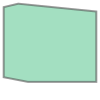

In [110]:
clipped_b.as_arcpy

You can find the source geometry (dark shaded polygon) and the clipped geometry (the contained polygon with white diagnoal crosses) in the map below:


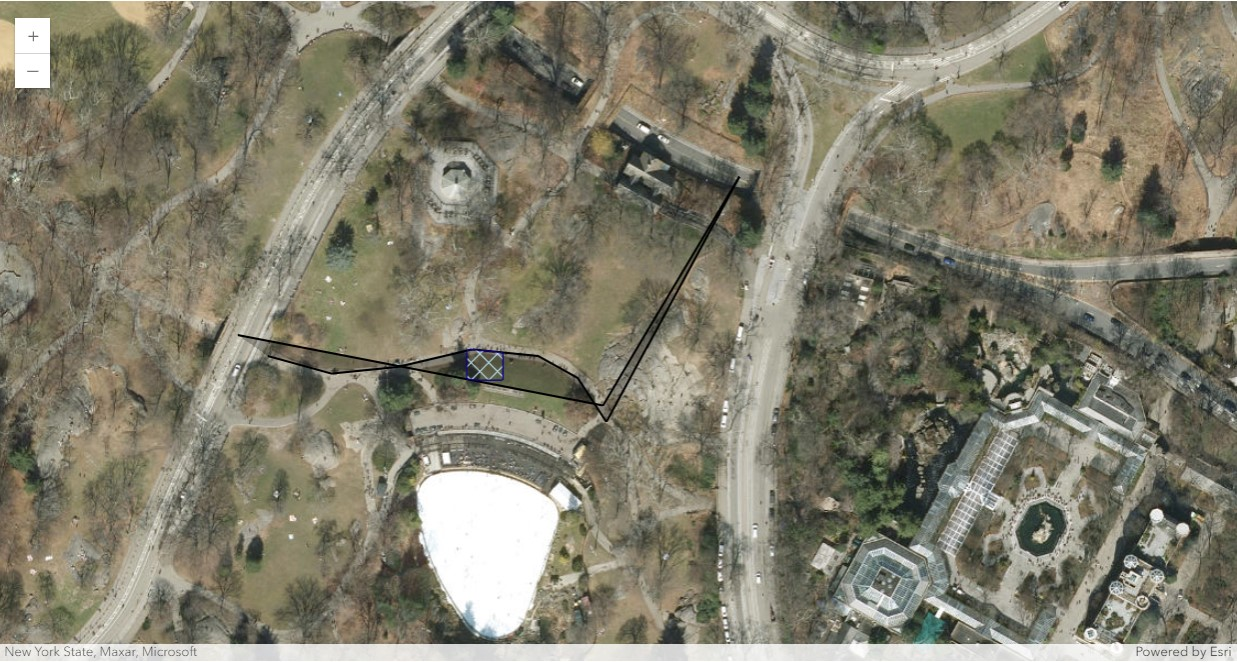

In [119]:
map4 = gis.map()
map4.basemap.basemap = "satellite"
map4

In [116]:
map4.extent = map1.extent
map4.zoom = 19

In [117]:
map4.content.draw(access_polygon)

In [118]:
map4.content.draw(clipped_b,
          symbol = SimpleFillSymbolEsriSFS(
            color = [173, 216, 230, 255],
            outline = SimpleLineSymbolEsriSLS(
              color = [0, 0, 139]
            ),
            style = SimpleFillSymbolStyle.esri_sfs_diagonal_cross
          ))

#### b10. Areas and Lengths

The `areas_and_lengths` function calculates areas and perimeter lengths for each `Polygon` object specified in the input array. The input parameters include:
  - `polygons` - The array of polygons whose areas and lengths are to be computed.
  - `length_unit` - The length unit in which the perimeters of polygons will be calculated. 
    - If `calculation_type` is `planar`, then length_unit can be any `esriUnits` constant. 
    - If `calculation_type` is not `planar`, then `length_unit` must be a linear `esriUnits` constant, such as `esriSRUnit_Meter`(i.e. `9001`|`LengthUnits.METER`) or `esriSRUnit_SurveyMile`(i.e. `9035`|`LengthUnits.SURVEYMILE`). 
    - If `length_unit` is not specified, the units are derived from `spatial_ref` parameter. If ``spatial_ref`` is not specified, the units are in meters. 
    - For a list of valid units, see <a href="https://developers.arcgis.com/enterprise-sdk/api-reference/net/esriSRUnitType/">`esriSRUnitType Constants`</a> and <a href="https://developers.arcgis.com/enterprise-sdk/api-reference/net/esriSRUnitType/">`esriSRUnit2Type Constants`</a>.
  - `area_unit` - The area unit in which areas of polygons will be calculated. 
    - If `calculation_type` is `planar`, then `area_unit` can be any `esriAreaUnits` constant. 
    - If `calculation_type` is not `planar`, then `area_unit` must be a linear esriUnits constant such as `AreaUnits.SQUAREMETERS` (i.e. `{"areaUnit": "esriSquareMeters"}`) or `AreaUnits.SQUAREMILES` (i.e. `{"areaUnit": "esriSquareMiles"}`).
    - If `area_unit` is not specified, the units are derived from `spatial_ref`. If `spatial_ref` is not specified, then the units are meters.
    - For a list of valid units, see <a href="https://developers.arcgis.com/enterprise-sdk/api-reference/net/esriAreaUnits/">`esriAreaUnits Constants`</a>. The list of valid `esriAreaUnits constants` include, esriSquareInches | esriSquareFeet | esriSquareYards | esriAcres | esriSquareMiles | esriSquareMillimeters | esriSquareCentimeters | esriSquareDecimeters | esriSquareMeters | esriAres | esriHectares | esriSquareKilometers.
  - `calculation_type` - The type defined for the area and length calculation of the input geometries. The type can be one of the following values:
    - `planar` - Planar measurements use 2D Euclidean distance to calculate area and length. This should only be used if the area or length needs to be calculated in the given `SpatialReference`. Otherwise, use ``preserveShape``.
    - `geodesic` - Use this type if you want to calculate an area or length using only the vertices of the `Polygon` and define the lines between the points as geodesic segments independent of the actual shape of the `Polygon`. A geodesic segment is the shortest path between two points on an ellipsoid.
    - `preserveShape` - This type calculates the area or length of the geometry on the surface of the Earth ellipsoid. The shape of the geometry in its coordinate system is preserved.
    
There are other optional parameters that can be specified in the input arguments. For more information, check out the <a href="https://developers.arcgis.com/python/api-reference/arcgis.geometry.functions.html?highlight=areas_and_lengths#arcgis.geometry.functions.areas_and_lengths">API ref</a>. Now let's look at two use cases below:

##### The traditional use case

For API version <= 1.9.0, `length_unit` shall be input as a constant integer value (as found in <a href="https://developers.arcgis.com/enterprise-sdk/api-reference/net/esriAreaUnits/">esriSRUnitType Constants</a> or <a href="https://developers.arcgis.com/enterprise-sdk/api-reference/net/esriSRUnitType/">`esriSRUnit2Type Constants`</a>) while `area_unit` only accepts a `dict` object, where the a list of valid units can be found in <a href="https://developers.arcgis.com/enterprise-sdk/api-reference/net/esriAreaUnits/">`esriAreaUnits Constants`</a>.

In [120]:
from arcgis.geometry.functions import areas_and_lengths

areas_and_lengths(polygons =[access_polygon],
                  length_unit = 9001,
                  spatial_ref=3857,
                  area_unit = {"areaUnit": "esriSquareMeters"},
                  calculation_type = "planar")

{'areas': [266.67415681137567], 'lengths': [720.7725858813257]}

##### The enhanced use case

After 1.9.0, there is an easier way to represent `length_unit` and `area_unit`. Users can use `enum` declared in the `arcgis.geometry.functions.AreaUnits` and `arcgis.geometry.functions.LengthUnits` as input, e.g. 
  - the `length_unit` parameter can be represented by `LengthUnits.BRITISH1936FOOT | LengthUnits.GOLDCOASTFOOT | LengthUnits.INTERNATIONALCHAIN | LengthUnits.INTERNATIONALLINK | LengthUnits.INTERNATIONALYARD | LengthUnits.METER | LengthUnits.FOOT | LengthUnits.SURVEYFOOT | LengthUnits.CLARKEFOOT | LengthUnits.FATHOM | etc.`
  - while the `area_unit` parameter can be represented by `AreaUnits.SQUAREINCHES | AreaUnits.SQUAREFEET | AreaUnits.SQUAREYARDS | AreaUnits.ACRES  | AreaUnits.SQUAREMILES  | AreaUnits.SQUAREMILLIMETERS  | AreaUnits.SQUARECENTIMETERS  | AreaUnits.SQUAREDECIMETERS  | AreaUnits.SQUAREMETERS  | AreaUnits.ARES  | AreaUnits.HECTARES  | AreaUnits.SQUAREKILOMETERS | etc.`

In [121]:
from arcgis.geometry.functions import LengthUnits, AreaUnits

res = areas_and_lengths(polygons =[access_polygon],
                        length_unit = LengthUnits.METER,
                        area_unit = AreaUnits.SQUAREMETERS,
                        calculation_type = "planar",
                        future = True)
res

<areas_and_lengths job eb7a80cfee384f518fbe8a8f46e9c860>

Also note that, when `future` is set to True, the `areas_and_lengths` function will return a `GeometryJob` object which indicates the job is processed asynchronously. When the job is done, querying its result will bring out a `dict` object of `areas`, and `lengths` for the list of polygons.

In [122]:
res.result()

{'areas': [266.67415681137567], 'lengths': [720.7725858813257]}

## Conclusion

In this notebook, we explored the two approaches to performing spatial operations: 
- (a) Object Oriented Programming (OOP) pattern (calling operations directly off Geometry object). This pattern utilizes local geometry engines (ArcPy or Shapely) and performs the computation on the machine running the Python kernel 
- (b) calling functions from `arcgis.geometry.functions`, which sends the spatial data over to a Geometry Service running on the active GIS connection, performs the operations remotely, and returns the results as Geometry objects.

In most cases, approach (a) is simpler and more staightforward, and is recommended for users getting to use the ArcGIS API for Python. Additionally, another advantage of (a) is that it does not consume credits and is performant for larger datasets. However, (a) uses local geometry engines such as `shapely` or `arcpy`- in situations where neither shapely nor arcpy is installed on the execution environment, approach (b) is the alternative.